In [79]:
# main libraries
import pandas as pd
import numpy as np
import time
# visual libraries
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')
# sklearn libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score, r2_score, mean_squared_error,matthews_corrcoef,classification_report,roc_curve
# from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
!pwd

/content


In [4]:
%cd "/content/gdrive/MyDrive"

/content/gdrive/MyDrive


In [5]:
import os
if not os.path.isdir("Recog_dataset"):
  os.makedirs("Recog_dataset")


In [47]:
df_2 = pd.read_csv('/content/gdrive/MyDrive/Recog_dataset/recog_train_data.csv')

In [27]:
df = pd.read_csv('/content/gdrive/MyDrive/Recog_dataset/recog_train_data.csv')
df_copy = pd.DataFrame()
df_copy = df;
df.head()

,Datetime,Temperature,Humidity,Zephyr,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620
1,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127
2,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620
3,1/1/2017 1:00,5.641,77.7,0.080,0.048,0.096,25998.98734
4,1/1/2017 1:20,5.678,78.1,0.081,0.066,0.141,24777.72152


In [7]:
df.shape

(18345, 7)

In [8]:
df.isnull().any().sum()

0

In [30]:
df_copy.dtypes

Datetime               datetime64[ns]
Temperature                   float64
Humidity                      float64
Zephyr                        float64
GeneralDiffuseFlows           float64
DiffuseFlows                  float64
PowerConsumption              float64
dtype: object

In [36]:
df_copy['Datetime'] = pd.to_datetime(df_copy['Datetime'])
df_copy['Datetime_month'] = df_copy['Datetime'].dt.month
df_copy['Datetime_week'] = df_copy['Datetime'].dt.isocalendar().week
df_copy['Datetime_day'] = df_copy['Datetime'].dt.day
df_copy['Datetime_hour'] = df_copy['Datetime'].dt.hour
df_copy['Datetime_minute'] = df_copy['Datetime'].dt.minute
df_copy['Datetime_dayofweek'] = df_copy['Datetime'].dt.dayofweek
df_copy.head()

,Datetime,Temperature,Humidity,Zephyr,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption,Datetime_month,Datetime_week,Datetime_day,Datetime_hour,Datetime_minute,Datetime_dayofweek
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,1,52,1,0,0,6
1,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,1,52,1,0,20,6
2,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,1,52,1,0,40,6
3,2017-01-01 01:00:00,5.641,77.7,0.080,0.048,0.096,25998.98734,1,52,1,1,0,6
4,2017-01-01 01:20:00,5.678,78.1,0.081,0.066,0.141,24777.72152,1,52,1,1,20,6


In [37]:
# df_copy.drop(['Datetime_month','Datetime_week','Datetime_day','Datetime_hour','Datetime_minute','Datetime_dayofweek'],axis = 1, inplace = True)
df_copy.drop(['Datetime'],axis = 1, inplace = True)

In [49]:
# df_copy.head()
# df_copy.describe()
# df_copy.drop(['PowerConsumption'],axis = 1,inplace = True)
df_copy['PowerConsumption'] = df_2['PowerConsumption']
df_copy.head()

,Temperature,Humidity,Zephyr,GeneralDiffuseFlows,DiffuseFlows,Datetime_month,Datetime_week,Datetime_day,Datetime_hour,Datetime_minute,Datetime_dayofweek,PowerConsumption
0,6.559,73.8,0.083,0.051,0.119,1,52,1,0,0,6,34055.69620
1,6.313,74.5,0.080,0.062,0.100,1,52,1,0,20,6,29128.10127
2,5.921,75.7,0.081,0.048,0.085,1,52,1,0,40,6,27335.69620
3,5.641,77.7,0.080,0.048,0.096,1,52,1,1,0,6,25998.98734
4,5.678,78.1,0.081,0.066,0.141,1,52,1,1,20,6,24777.72152


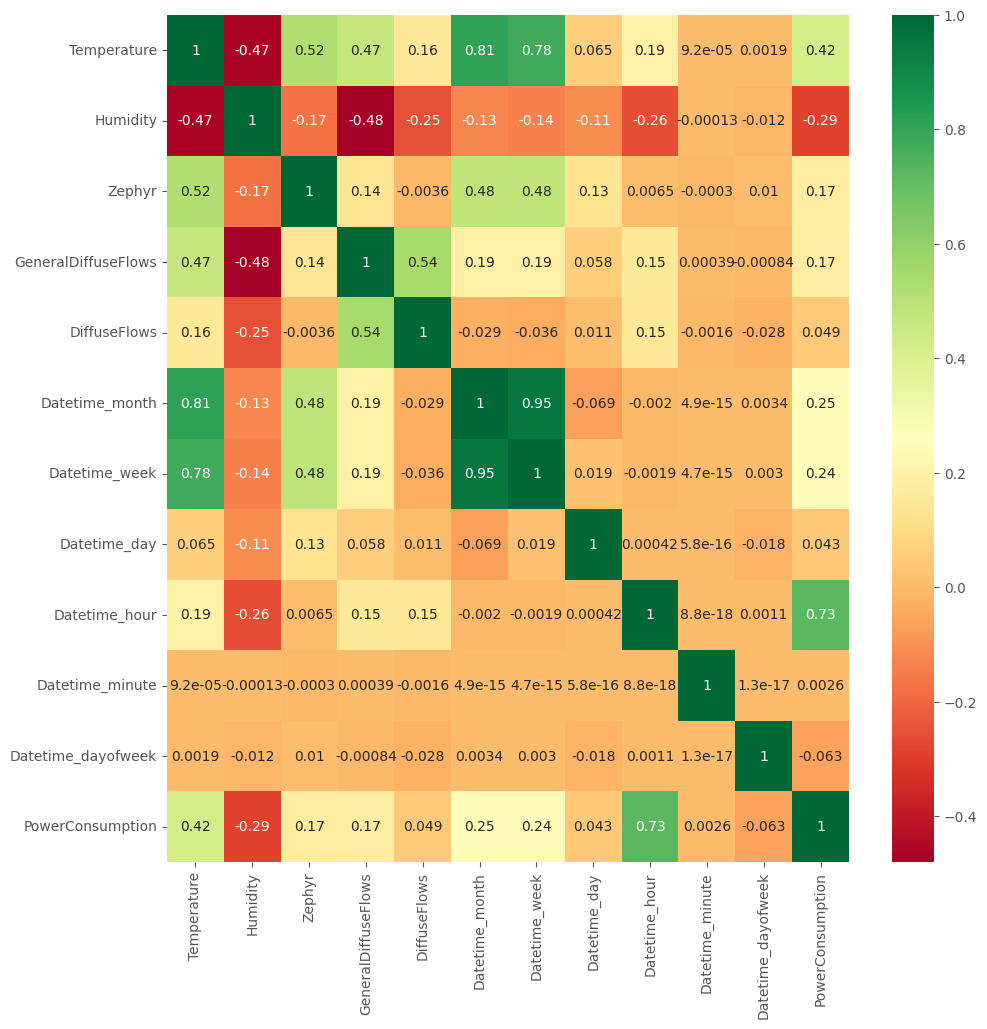

In [50]:
corrmat = df_copy.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(11,11))
#plot heat map
g=sns.heatmap(df_copy[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [55]:
df_copy.PowerConsumption.describe()

count    18345.000000
mean     32954.219796
std       7251.530496
min      13920.000000
25%      26708.344370
50%      33096.026640
75%      38227.774090
max      52204.395120
Name: PowerConsumption, dtype: float64

In [56]:
df_copy['PowerConsumption'] = df_copy['PowerConsumption']/32954

In [57]:
df_copy.head()

,Temperature,Humidity,Zephyr,GeneralDiffuseFlows,DiffuseFlows,Datetime_month,Datetime_week,Datetime_day,Datetime_hour,Datetime_minute,Datetime_dayofweek,PowerConsumption
0,6.559,73.8,0.083,0.051,0.119,1,52,1,0,0,6,1.033431
1,6.313,74.5,0.080,0.062,0.100,1,52,1,0,20,6,0.883902
2,5.921,75.7,0.081,0.048,0.085,1,52,1,0,40,6,0.829511
3,5.641,77.7,0.080,0.048,0.096,1,52,1,1,0,6,0.788948
4,5.678,78.1,0.081,0.066,0.141,1,52,1,1,20,6,0.751888


In [58]:
# min_max_scaler = MinMaxScaler(feature_range = (0, 1))
# df['MTemperature'] = min_max_scaler.fit_transform(df['Temperature'].values)

scaler = MinMaxScaler(feature_range = (0, 1))
df1 = pd.DataFrame(scaler.fit_transform(df_copy.iloc[:,0:11]),
                   columns=['Temperature','Humidity', 'Zephyr', 'GeneralDiffuseFlows','DiffuseFlows','Datetime_month','Datetime_week','Datetime_day','Datetime_hour','Datetime_minute','Datetime_dayofweek'])


In [59]:
df1.head()

,Temperature,Humidity,Zephyr,GeneralDiffuseFlows,DiffuseFlows,Datetime_month,Datetime_week,Datetime_day,Datetime_hour,Datetime_minute,Datetime_dayofweek
0,0.085263,0.758625,0.006696,0.000040,0.000095,0.0,1.0,0.0,0.000000,0.0,1.0
1,0.078536,0.767158,0.006088,0.000050,0.000074,0.0,1.0,0.0,0.000000,0.5,1.0
2,0.067817,0.781787,0.006291,0.000038,0.000058,0.0,1.0,0.0,0.000000,1.0,1.0
3,0.060160,0.806168,0.006088,0.000038,0.000070,0.0,1.0,0.0,0.043478,0.0,1.0
4,0.061172,0.811045,0.006291,0.000053,0.000120,0.0,1.0,0.0,0.043478,0.5,1.0


In [60]:
df1['PowerConsumption'] = df_copy['PowerConsumption']

In [61]:
df1.head()

,Temperature,Humidity,Zephyr,GeneralDiffuseFlows,DiffuseFlows,Datetime_month,Datetime_week,Datetime_day,Datetime_hour,Datetime_minute,Datetime_dayofweek,PowerConsumption
0,0.085263,0.758625,0.006696,0.000040,0.000095,0.0,1.0,0.0,0.000000,0.0,1.0,1.033431
1,0.078536,0.767158,0.006088,0.000050,0.000074,0.0,1.0,0.0,0.000000,0.5,1.0,0.883902
2,0.067817,0.781787,0.006291,0.000038,0.000058,0.0,1.0,0.0,0.000000,1.0,1.0,0.829511
3,0.060160,0.806168,0.006088,0.000038,0.000070,0.0,1.0,0.0,0.043478,0.0,1.0,0.788948
4,0.061172,0.811045,0.006291,0.000053,0.000120,0.0,1.0,0.0,0.043478,0.5,1.0,0.751888


In [62]:
features = df1.drop(['PowerConsumption'], axis = 1)
labels = pd.DataFrame(df1['PowerConsumption'])

feature_array = features.values
label_array = labels.values

X_train, X_test, y_train, y_test = train_test_split(feature_array, label_array, test_size=0.15)

X_train = normalize(X_train)
X_test=normalize(X_test)

In [107]:
y_train

array([[1.20307376],
       [0.78007042],
       [0.78320392],
       ...,
       [1.22295926],
       [0.7313595 ],
       [0.72399188]])

In [14]:
neighbours = np.arange(1,10)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

# for i,k in enumerate(neighbours):
#Setup a knn classifier with k neighbors
# knn=KNeighborsRegressor(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X_train, y_train.ravel())

poly.fit(X_poly, y_train.ravel())
lin2 = LinearRegression()
lin2.fit(X_poly, y_train.ravel())
#Fit the model

#Compute accuracy on the training set
train_accuracy[0] = r2_score(y_train.ravel(), lin2.predict(poly.fit_transform(X_train)))

#Compute accuracy on the test set
test_accuracy[0] = r2_score(y_test.ravel(), lin2.predict(poly.fit_transform(X_test)))


In [ ]:
#Generate plot
# plt.title('k-NN Varying number of neighbors')
# plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
# plt.plot(neighbours, train_accuracy, label='Training accuracy')
# plt.legend()
# plt.xlabel('Number of neighbors')
# plt.ylabel('Accuracy')
# plt.show()

In [63]:
knn=KNeighborsRegressor(n_neighbors=20,algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train, y_train.ravel())

KNeighborsRegressor(algorithm='kd_tree', n_jobs=-1, n_neighbors=20)

In [80]:
y_knn_train_pred = knn.predict(X_train)
y_knn_test_pred = knn.predict(X_test)

In [81]:
knn_train_mse = mean_squared_error(y_train, y_knn_train_pred)
knn_train_r2 = r2_score(y_train, y_knn_train_pred)
knn_test_mse = mean_squared_error(y_test, y_knn_test_pred)
knn_test_r2 = r2_score(y_test, y_knn_test_pred)

In [82]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [83]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [84]:
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [86]:
rf = RandomForestRegressor(max_depth=2, random_state=42)
rf.fit(X_train, y_train.ravel())

RandomForestRegressor(max_depth=2, random_state=42)

In [87]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [88]:
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [90]:
knn_results = pd.DataFrame(['K Nearest Neighbours',knn_train_mse, knn_train_r2, knn_test_mse, knn_test_r2]).transpose()
knn_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

lr_results = pd.DataFrame(['Linear regression',lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

rf_results = pd.DataFrame(['Random forest',rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

In [91]:
pd.concat([knn_results, lr_results, rf_results])

,Method,Training MSE,Training R2,Test MSE,Test R2
0,K Nearest Neighbours,0.008201,0.831289,0.008818,0.813597
0,Linear regression,0.020533,0.577609,0.020396,0.568847
0,Random forest,0.020378,0.580793,0.019732,0.582881


In [114]:
y_lr_train_pred = np.squeeze(y_lr_train_pred)
y_rf_train_pred = np.squeeze(y_rf_train_pred)
y_knn_train_pred = np.squeeze(y_knn_train_pred)
y_train = np.squeeze(y_train)

y_train.shape

(15593,)

Text(0.5, 0, 'Experimental Power')

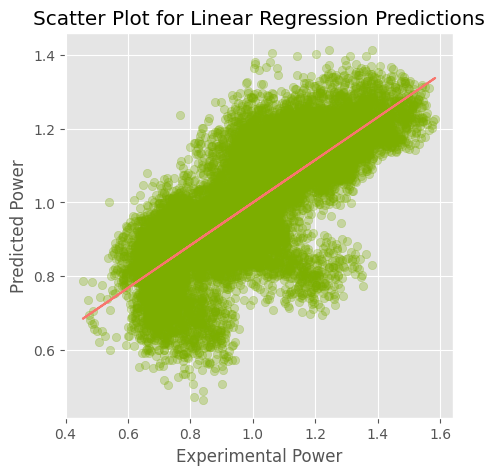

In [121]:
plt.figure(figsize=(5,5))
plt.title('Scatter Plot for Linear Regression Predictions')
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00", alpha=0.3)
z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train,p(y_train),"#F8766D")
plt.ylabel('Predicted Power')
plt.xlabel('Experimental Power')

Text(0.5, 0, 'Experimental Power')

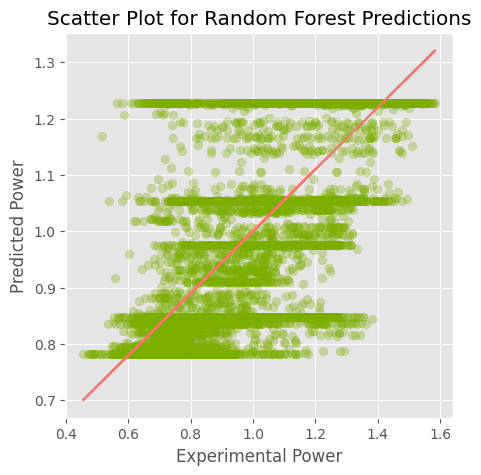

In [122]:
plt.figure(figsize=(5,5))
plt.title('Scatter Plot for Random Forest Predictions')
plt.scatter(x=y_train, y=y_rf_train_pred, c="#7CAE00", alpha=0.3)
z = np.polyfit(y_train, y_rf_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train,p(y_train),"#F8766D")
plt.ylabel('Predicted Power')
plt.xlabel('Experimental Power')

Text(0.5, 0, 'Experimental Power')

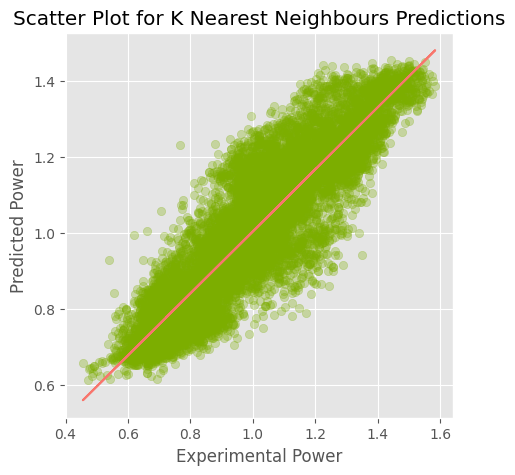

In [123]:
plt.figure(figsize=(5,5))
plt.title('Scatter Plot for K Nearest Neighbours Predictions')
plt.scatter(x=y_train, y=y_knn_train_pred, c="#7CAE00", alpha=0.3)
z = np.polyfit(y_train, y_knn_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train,p(y_train),"#F8766D")
plt.ylabel('Predicted Power')
plt.xlabel('Experimental Power')

In [72]:
test_df_2 = pd.read_csv('/content/gdrive/MyDrive/Recog_dataset/recog_test_data.csv')

In [65]:
test_df = pd.read_csv('/content/gdrive/MyDrive/Recog_dataset/recog_test_data.csv')
test_df.head()
test_df_copy = pd.DataFrame()
test_df_copy = test_df
# test_df.shape

In [66]:
test_df_copy['Datetime'] = pd.to_datetime(test_df_copy['Datetime'])
test_df_copy['Datetime_month'] = test_df_copy['Datetime'].dt.month
test_df_copy['Datetime_week'] = test_df_copy['Datetime'].dt.isocalendar().week
test_df_copy['Datetime_day'] = test_df_copy['Datetime'].dt.day
test_df_copy['Datetime_hour'] = test_df_copy['Datetime'].dt.hour
test_df_copy['Datetime_minute'] = test_df_copy['Datetime'].dt.minute
test_df_copy['Datetime_dayofweek'] = test_df_copy['Datetime'].dt.dayofweek
test_df_copy.head()

,Datetime,Temperature,Humidity,Zephyr,GeneralDiffuseFlows,DiffuseFlows,Datetime_month,Datetime_week,Datetime_day,Datetime_hour,Datetime_minute,Datetime_dayofweek
0,2017-09-12 19:00:00,23.51,50.15,0.271,46.780,49.950,9,37,12,19,0,1
1,2017-09-12 19:20:00,22.97,52.65,0.273,9.520,7.830,9,37,12,19,20,1
2,2017-09-12 19:40:00,22.73,53.68,0.271,1.257,1.093,9,37,12,19,40,1
3,2017-09-12 20:00:00,22.37,54.65,0.269,0.080,0.104,9,37,12,20,0,1
4,2017-09-12 20:20:00,22.07,55.85,0.274,0.080,0.089,9,37,12,20,20,1


In [67]:
test_df_copy.drop(['Datetime'],axis = 1,inplace = True)

In [68]:
test_df1 = pd.DataFrame(scaler.fit_transform(test_df_copy.iloc[:,0:11]),
                   columns=['Temperature','Humidity', 'Zephyr', 'GeneralDiffuseFlows', 'DiffuseFlows','Datetime_month','Datetime_week','Datetime_day','Datetime_hour','Datetime_minute','Datetime_dayofweek'])


In [69]:
predicted_val = knn.predict(test_df1)
print(predicted_val)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


[1.13710053 1.15654305 1.13984047 ... 1.3789919  1.39858503 1.38384779]


In [92]:
predicted_val_lr = lr.predict(test_df1)
print(predicted_val_lr)

[[1.5119469 ]
 [1.57810433]
 [1.64005522]
 ...
 [1.9016162 ]
 [1.96479524]
 [2.02648554]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [94]:
predicted_val_rf = rf.predict(test_df1)
print(predicted_val_rf)

[1.05430317 1.22819309 1.22819309 ... 1.22819309 1.22819309 1.22819309]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [20]:
submitt = pd.DataFrame()

In [100]:
submitt['Datetime'] = test_df_2['Datetime']
# submitt['PowerConsumption'] = pd.DataFrame(predicted_val)
submitt['PowerConsumption'] = pd.DataFrame(predicted_val_lr)
# submitt['PowerConsumption'] = pd.DataFrame(predicted_val_rf)
submitt['PowerConsumption'] = submitt['PowerConsumption']*32954

In [101]:
submitt.head()

,Datetime,PowerConsumption
0,9/12/2017 19:00,49824.698273
1,9/12/2017 19:20,52004.850002
2,9/12/2017 19:40,54046.379686
3,9/12/2017 20:00,50901.420593
4,9/12/2017 20:20,52850.511365


In [102]:
submitt.shape

(7863, 2)

In [103]:
%cd "/content/gdrive/MyDrive/Recog_dataset"

/content/gdrive/MyDrive/Recog_dataset


In [104]:
submitt.to_csv("Submission_LR.csv", index = False)

In [ ]:
!pwd

/content/gdrive/MyDrive/Recog_dataset
